In [1]:
import torch
import torch.nn as nn 
import torchvision 
from torchvision import datasets, transforms, models 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 
import sys, os 
from glob import glob 
import imageio


C:\Users\User\AppData\Local\Temp\ipykernel_6828\848180482.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread("Food-5K/training/0_5.jpg"))


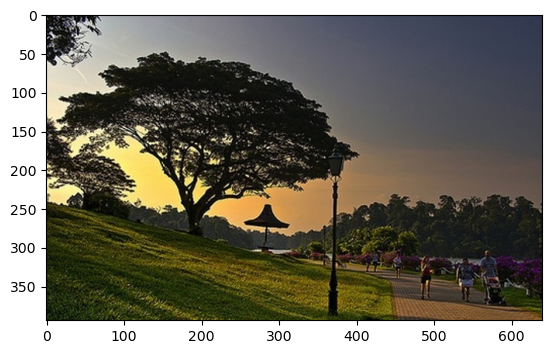

In [2]:
plt.imshow(imageio.imread("Food-5K/training/0_5.jpg"))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6828\2441626170.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread("Food-5K/training/1_5.jpg"))


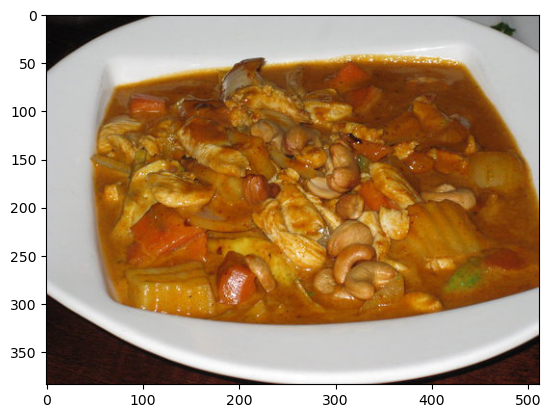

In [3]:
plt.imshow(imageio.imread("Food-5K/training/1_5.jpg"))
plt.show()

In [6]:
!mkdir data 

A subdirectory or file data already exists.


In [11]:
!cd data

In [12]:
pwd

'e:\\pytorch\\Pytorch for AI and ML\\Pytorch_Tutorial\\Transfer Learning'

In [13]:
cd data

e:\pytorch\Pytorch for AI and ML\Pytorch_Tutorial\Transfer Learning\data


In [14]:
!mkdir train 


In [15]:
!mkdir test 

In [17]:
!mkdir train\nonfood

In [18]:
!mkdir train\food

In [19]:
!mkdir test\nonfood

In [20]:
!mkdir test\food

In [21]:
cd .

e:\pytorch\Pytorch for AI and ML\Pytorch_Tutorial\Transfer Learning\data


In [23]:
cd ..

e:\pytorch\Pytorch for AI and ML\Pytorch_Tutorial\Transfer Learning


In [24]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 6073-5F85

 Directory of e:\pytorch\Pytorch for AI and ML\Pytorch_Tutorial\Transfer Learning

04/06/2023  21:20    <DIR>          .
04/06/2023  21:20    <DIR>          ..
04/12/2019  15:48    <DIR>          __MACOSX
04/06/2023  21:21    <DIR>          data
15/09/2019  01:15    <DIR>          Food-5K
04/06/2023  15:10       447,001,986 Food-5K.zip
04/06/2023  21:20    <DIR>          train
04/06/2023  21:22           782,754 transfer_learning.ipynb
               2 File(s)    447,784,740 bytes
               6 Dir(s)  441,199,312,896 bytes free


In [28]:
import os 
import shutil 

src_folder = "Food-5K/training"
train_folder_food = "data/train/food"
train_folder_nonfood = "data/train/nonfood" 

files = os.listdir(src_folder) 

for file in files:
    if file.startswith('1'):
        shutil.move(src_folder+"/"+file, train_folder_food+"/"+file)
    
    elif file.startswith('0'):
        shutil.move(src_folder+"/"+file, train_folder_nonfood+"/"+file)
    


In [29]:
import os 
import shutil 

src_folder = "Food-5K/validation"
test_folder_food = "data/test/food"
test_folder_nonfood = "data/test/nonfood" 

files = os.listdir(src_folder) 

for file in files:
    if file.startswith('1'):
        shutil.move(src_folder+"/"+file, test_folder_food+"/"+file)
    
    elif file.startswith('0'):
        shutil.move(src_folder+"/"+file, test_folder_nonfood+"/"+file)
    


In [30]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
    transforms.RandomRotation(degrees=15), 
    transforms.ColorJitter(), 
    transforms.CenterCrop(size=224), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), 
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    
])

test_transform = transforms.Compose([
    transforms.Resize(size=256), 
    transforms.CenterCrop(size=224), 

    transforms.ToTensor(), 
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    
])

In [31]:
train_dataset = datasets.ImageFolder(
    'data/train',
    transform=train_transform
)

test_dataset = datasets.ImageFolder(
    'data/test',
    transform=test_transform
) 

In [46]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)



In [34]:
model = models.vgg19(pretrained=True)

d:\Anaconda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\User/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [47]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [48]:
model.classifier

Linear(in_features=25088, out_features=2, bias=True)

In [49]:
n_features = model.classifier[0].in_features
n_features

TypeError: 'Linear' object is not subscriptable

In [38]:
model.classifier = nn.Linear(n_features, 2)

In [50]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device) 
model.to(device) 


cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [52]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters())

In [53]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs) 
    test_losses = np.zeros(epochs)

    for i in range(epochs):
        t0 = datetime.now()
        train_loss = [] 
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs) 

            loss = criterion(outputs, targets) 

            loss.backward() 
            optimizer.step() 

            train_loss.append(loss.item()) 

        train_loss = np.mean(train_loss) 

        test_loss = [] 
        for inputs, targets in test_loader:
            
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs) 

            loss = criterion(outputs, targets) 

            

            test_loss.append(loss.item()) 
        test_loss = np.mean(test_loss) 


        train_losses[i] = train_loss 
        test_losses[i] = test_loss

        dt = datetime.now() - t0 

        print(f"Epochs {i+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")

    return train_losses, test_losses
        


In [54]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=5)

RuntimeError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 2.00 GiB total capacity; 1.70 GiB already allocated; 0 bytes free; 1.72 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF